#### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import global_params as G
plt.rcParams['figure.figsize'] = G.SMALL_FIG

In [3]:
import numpy as np
from numpy import pi
np.set_printoptions(precision=4, suppress=True)

In [4]:
import wavegen as waves
from freq_domain import plotspec
from utilities import power, detect_env

In [5]:
from scipy import signal

## Envelope

In [6]:
dur = 0.33
Ts = 1/10000
t = np.arange(0, dur, Ts)

<IPython.core.display.Javascript object>


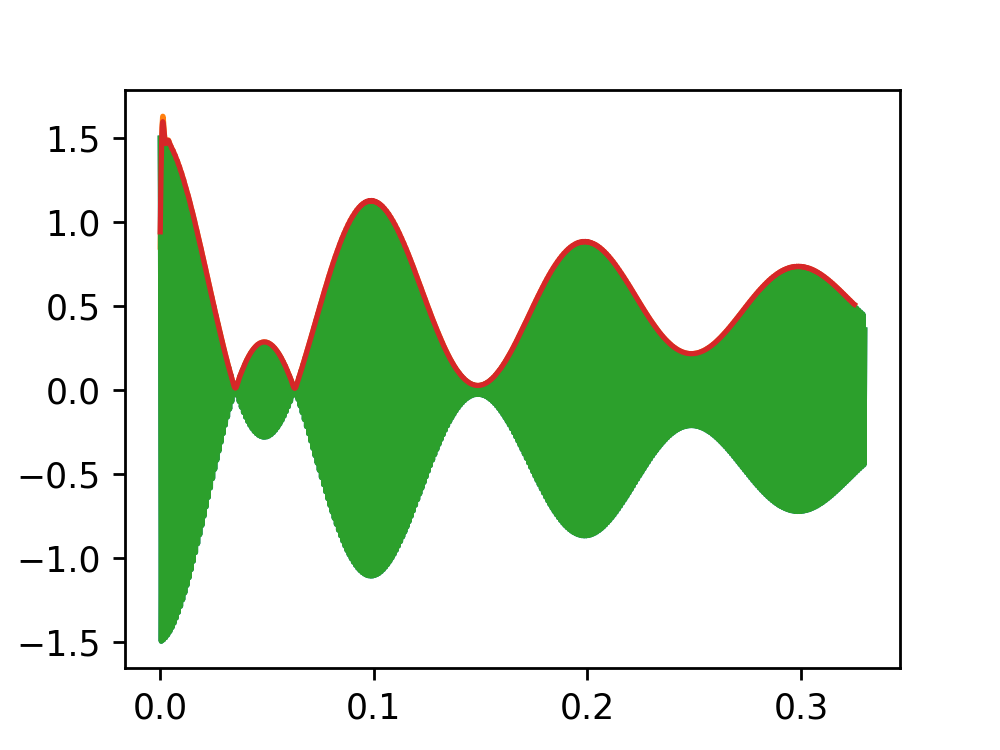

In [7]:
# Fast signal
fc = 1000
c = np.cos(2*pi*fc*t)

# Modulated with a decaying slow wave
fm = 10
w = np.cos(2*pi*fm*t)*np.exp(-5*t) + 0.5

x = c*w

# Low pass filter
fbe = [0, 0.05, 0.1, 1]
damps = [1, 1, 0, 0]
b = signal.firls(99, fbe, damps)
gd = 49 # Can be computed using signal.group_delay

envx = (pi/2)*signal.lfilter(b, 1, np.abs(x))

plt.plot(t, x)
plt.plot(t[:-gd], envx[gd:]); # Env shifted by group delay to align with signal

In [8]:
# Fast signal
fc = 1000
c = np.cos(2*pi*fc*t)

# Modulated with a decaying slow wave
fm = 10
w = np.cos(2*pi*fm*t)*np.exp(-5*t) + 0.5

x = c*w

# Low pass filter
fbe = [0, 0.05, 0.1, 1]
damps = [1, 1, 0, 0]
b = signal.firls(99, fbe, damps)
gd = 49 # Can be computed using signal.group_delay

x_rect = np.maximum(x, 0) # Use a rectifier instead of abs()
envx = (pi)*signal.lfilter(b, 1, x_rect)


plt.plot(t, x)
plt.plot(t[:-gd], envx[gd:]); # Env shifted by group delay to align with signal

### Amplitude Modulation with Large Carrier

<IPython.core.display.Javascript object>


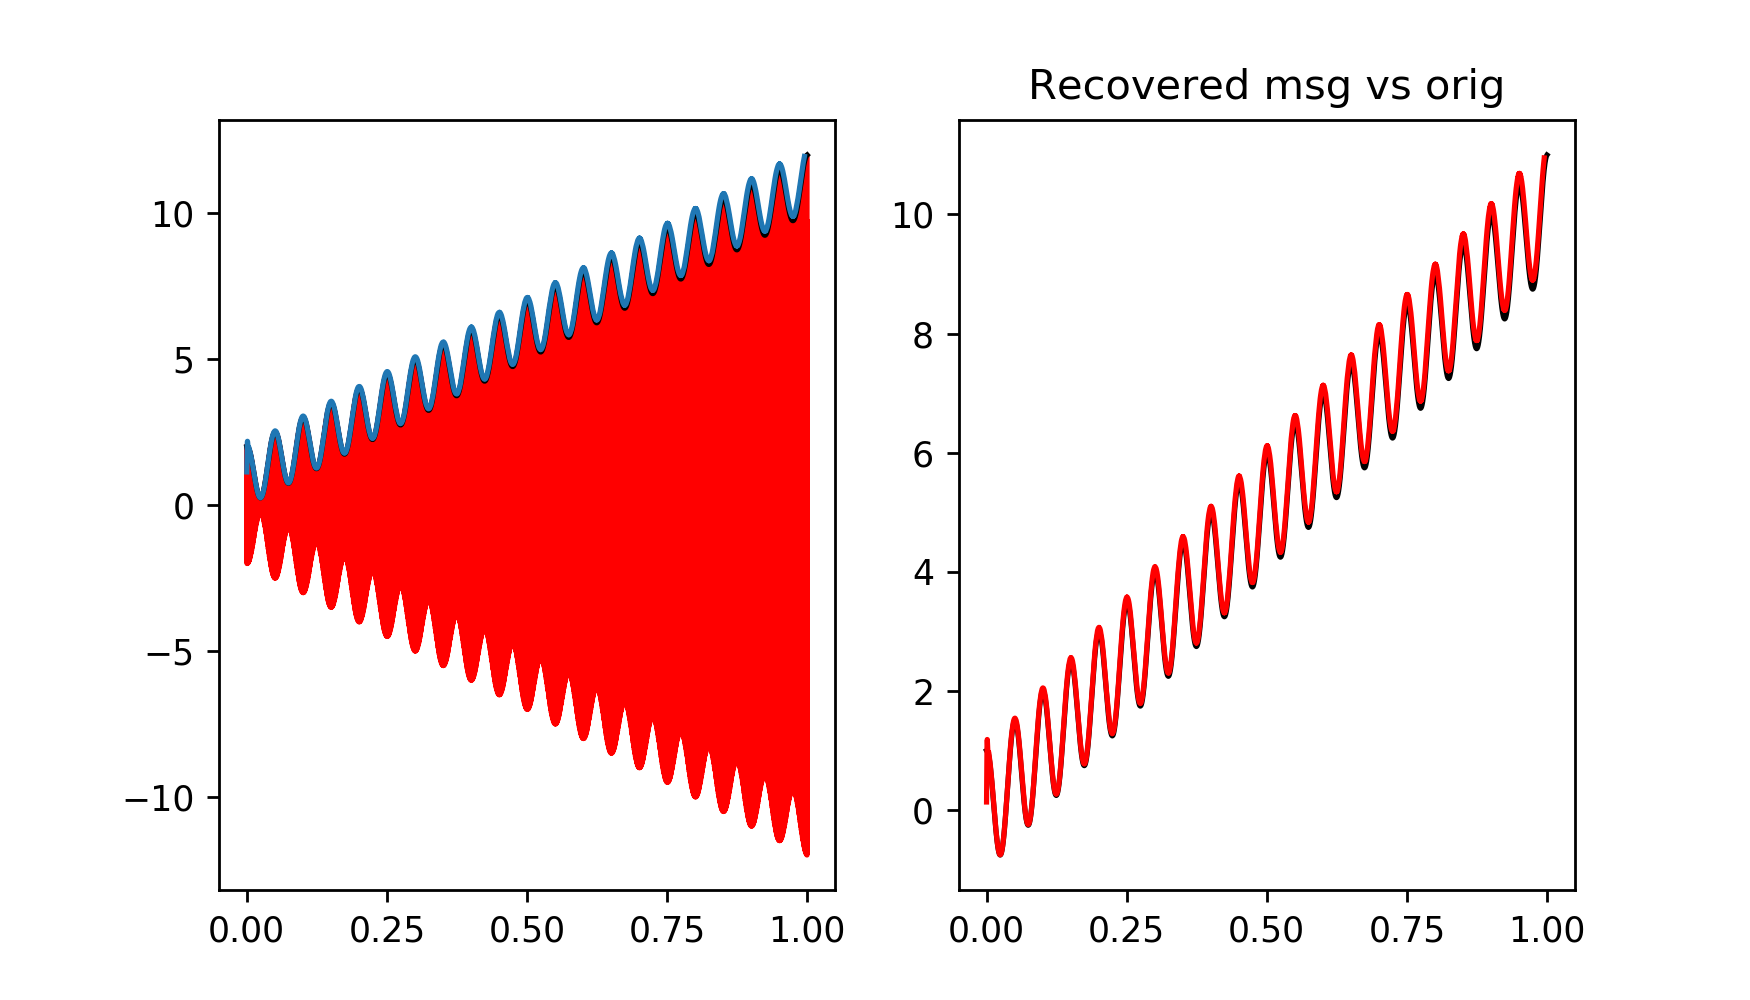

In [13]:
# Carrier
fc = 1000; 
phase = 0; g = 0;
c = np.cos(2*pi*(fc+g)*t + phase)
# Message
fm = 20; w = 10*np.arange(len(t))/len(t) + np.cos(2*np.pi*fm*t)
v = c*w + c
# Modulation
envv, gd = detect_env(v)

plt.figure(figsize=G.FIGSIZE)
plt.subplot(121)
plt.plot(t, v, 'r')
plt.plot(t, 1+w, 'k')
plt.plot(t[:-gd], envv[gd:]);

plt.subplot(122)
plt.plot(t, w, 'k')
plt.plot(t[:-gd], envv[gd:]-1, 'r');
plt.title('Recovered msg vs orig');

### AM with Suppressed Carrier

<IPython.core.display.Javascript object>


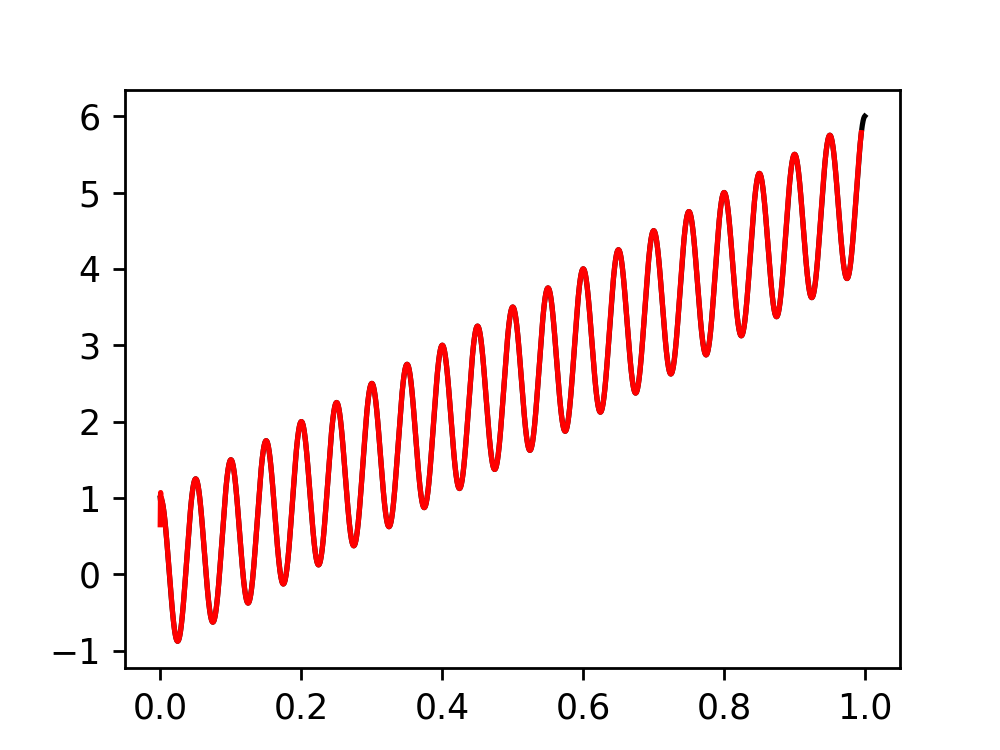

In [15]:
dur = 1.0
Ts = 1/10000
t = np.arange(0, dur, Ts)

## Transmitter
# Carrier
fc = 1000; 
c = np.cos(2*pi*fc*t)
# Message
fm = 20
w = 5*np.arange(len(t))/len(t) + np.cos(2*pi*fm*t)
v = c*w

## Receiver
gamma = 0
phi = 0
c2 = np.cos(2*pi*(fc+gamma)*t + phi)
x = v*c2
#LPF
fbe = [0, 0.1, 0.2, 1]
damps = [1, 1, 0, 0]
taps = 99; gd = 49
b = signal.firls(taps, fbe, damps)
m = 2*signal.lfilter(b, 1, x)

plt.plot(t, w, 'k')
plt.plot(t[:-gd], m[gd:], 'r');

<IPython.core.display.Javascript object>


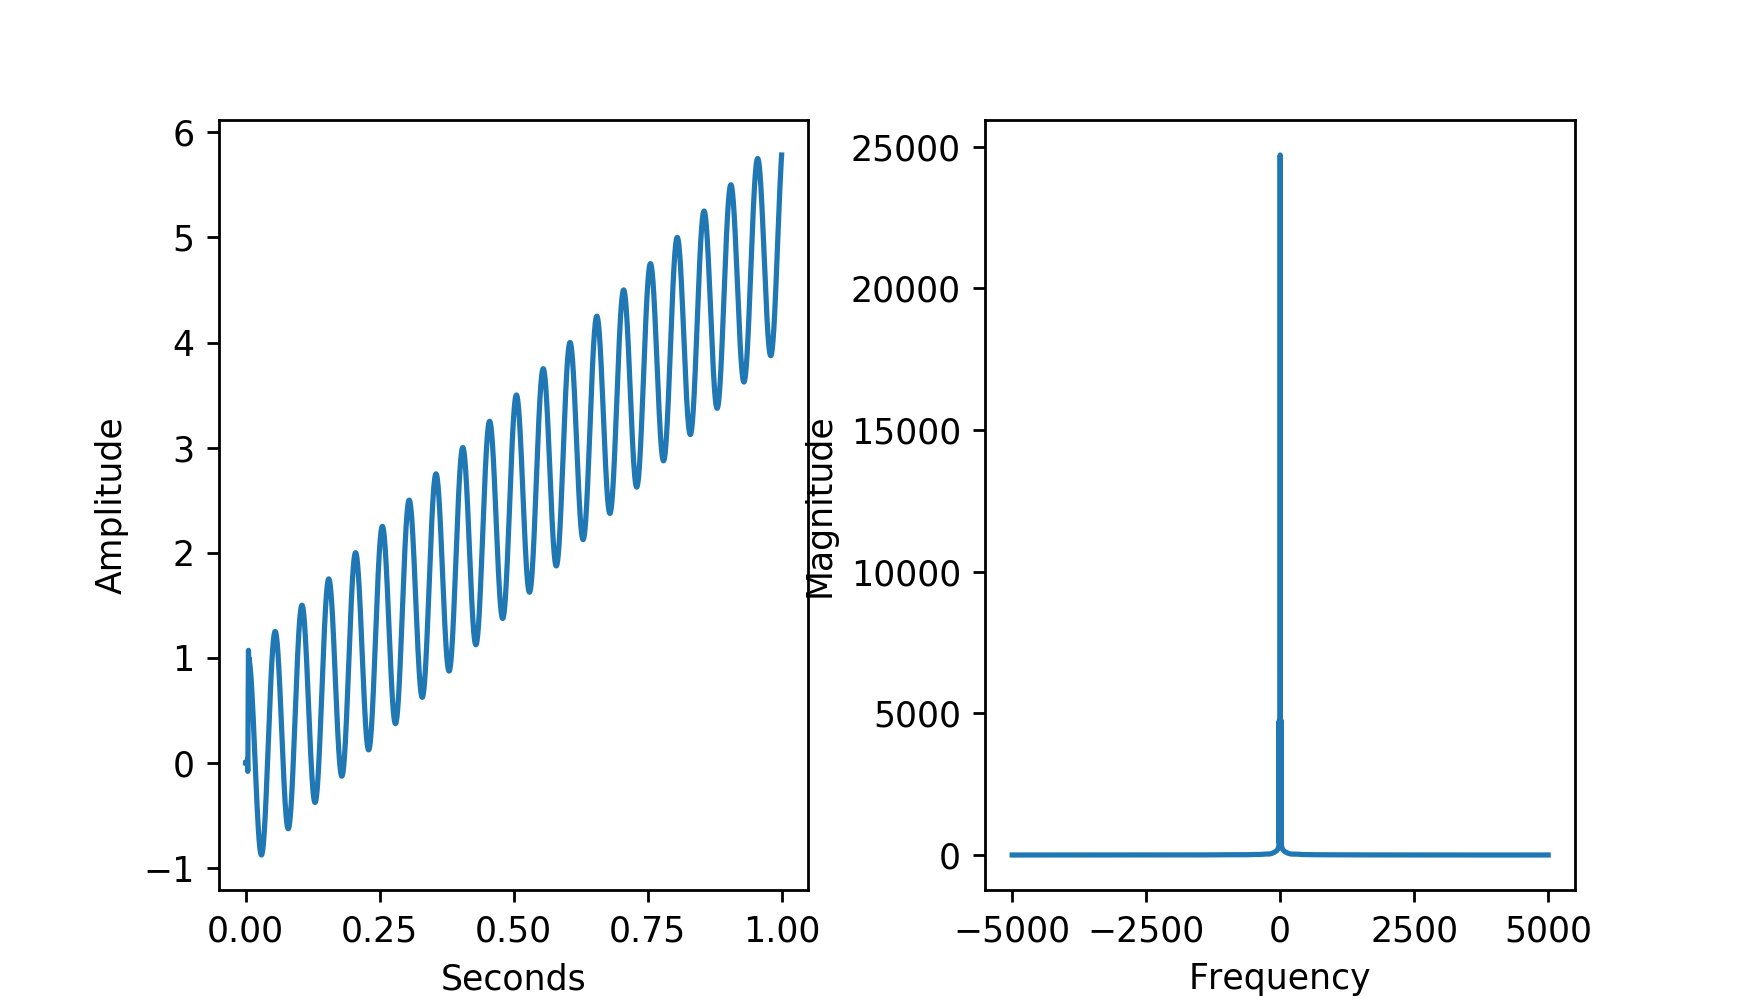

In [16]:
plotspec(m, Ts);

plt.close('all')